IMPORT ALL NECESSARY LIBRARIES

In [2]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

Load Fashion_mnist dataset from tensorflow. Fashion_mnist dataset documentation can be found in the following link: https://keras.io/api/datasets/fashion_mnist/

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Perform some exploratory analysis

In [4]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
#Perform a simple normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# As there are 10 clasess y the dataset, lets transform the labels to categorizar using one hot encoding
number_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, number_classes)
y_test = to_categorical(y_test, number_classes)

Subdivide Train data set into train and validation dataset with 50000 and 10000 instances respectively

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,train_size = 0.8 ,random_state=42)

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")


x_train shape: (48000, 28, 28), y_train shape: (48000, 10)
x_test shape: (10000, 28, 28), y_test shape: (10000, 10)
x_val shape: (12000, 28, 28), y_val shape: (12000, 10)


In [8]:
x_train[0].shape

(28, 28)

It is time to create the convolutional nerural network CNN

In [15]:
w_regulatizer = 1e-4

model = Sequential()
# ConvLayer 1
model.add(Conv2D(32, kernel_size=(3,3),
                 padding='same',
                 activation='relu',
                 kernel_regularizer = regularizers.l2(w_regulatizer),
                 input_shape=(28,28,1)))
model.add(Dropout(0.2))

# ConvLayer 2
model.add(Conv2D(64, kernel_size= (3,3),
                 padding= "same",
                 activation="relu",
                 kernel_regularizer = regularizers.l2(w_regulatizer)))
model.add(Dropout(0.2))

# ConvLayer 3
model.add(Conv2D(128, kernel_size= (3,3),
                 padding= "same",
                 activation="relu",
                 kernel_regularizer = regularizers.l2(w_regulatizer)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# ConvLayer 4
model.add(Conv2D(256, kernel_size= (3,3),
                 padding= "same",
                 activation="relu",
                 kernel_regularizer = regularizers.l2(w_regulatizer)))
model.add(Dropout(0.2))

# ConvLayer 5
model.add(Conv2D(512, kernel_size= (3,3),
                 padding= "same",
                 activation="relu",
                 kernel_regularizer = regularizers.l2(w_regulatizer)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# flatten
model.add(Flatten())
# Dense Layer 1
model.add(Dense(number_classes, activation='softmax'))

model.summary()




Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │         250,890 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,818,890 (6.94 MB)

 Trainable params: 1,818,890 (6.94 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss= "categorical_crossentropy", optimizer = "rmsprop", metrics= ["accuracy"])

In [17]:
hist = model.fit(x_train, y_train, batch_size=32,
                 epochs=10, validation_data=(x_val, y_val),
                 verbose= 2, shuffle= True)

Epoch 1/10
1500/1500 - 38s - 25ms/step - accuracy: 0.8412 - loss: 0.4920 - val_accuracy: 0.8658 - val_loss: 0.3967
Epoch 2/10
1500/1500 - 30s - 20ms/step - accuracy: 0.8984 - loss: 0.3303 - val_accuracy: 0.9031 - val_loss: 0.3202
Epoch 3/10
1500/1500 - 25s - 17ms/step - accuracy: 0.9105 - loss: 0.3061 - val_accuracy: 0.9130 - val_loss: 0.2906
Epoch 4/10
1500/1500 - 42s - 28ms/step - accuracy: 0.9138 - loss: 0.2935 - val_accuracy: 0.9055 - val_loss: 0.3187
Epoch 5/10
1500/1500 - 41s - 27ms/step - accuracy: 0.9193 - loss: 0.2881 - val_accuracy: 0.9135 - val_loss: 0.2969
Epoch 6/10
1500/1500 - 25s - 17ms/step - accuracy: 0.9209 - loss: 0.2805 - val_accuracy: 0.9168 - val_loss: 0.2920
Epoch 7/10
1500/1500 - 41s - 27ms/step - accuracy: 0.9229 - loss: 0.2778 - val_accuracy: 0.9198 - val_loss: 0.2797
Epoch 8/10
1500/1500 - 41s - 27ms/step - accuracy: 0.9258 - loss: 0.2726 - val_accuracy: 0.9246 - val_loss: 0.2732
Epoch 9/10
1500/1500 - 40s - 27ms/step - accuracy: 0.9253 - loss: 0.2717 - val_a

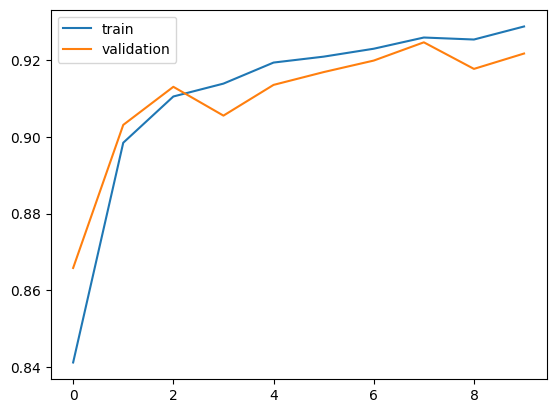

In [18]:
plt.plot(hist.history["accuracy"], label = "train")
plt.plot(hist.history["val_accuracy"], label = "validation")
plt.legend()
plt.show()

In [19]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9214 - loss: 0.3001


[0.29588446021080017, 0.9207000136375427]